# L07_Notebook_Naomi_Berumen_Group_4_ITAI3377
## IIoT Network Analysis: Age of Information and Reliability Trade-offs
**Name:** Naomi Berumen  
**Group:** Group 4  
**Course:** ITAI3377

This notebook includes:
- Conceptual understanding of Age of Information (AoI) and IIoT reliability
- Data exploration and visualization
- Machine learning model for AoI prediction
- Summary of findings and real-world application


## 1. Conceptual Understanding
**Age of Information (AoI)** measures how fresh the received information is at a central controller in an IIoT network. It's the time elapsed since the last successfully received update. AoI is critical in scenarios like predictive maintenance, where stale data could lead to suboptimal or dangerous decisions.

**Example:** A temperature sensor in a factory sending updates to avoid overheating machinery. If the controller receives stale data, it could fail to detect a critical rise in temperature in time.

**AoI-oriented traffic** aims to maintain fresh, periodic updates (e.g., sensor readings). **Deadline-oriented traffic** must be received within strict time bounds (e.g., emergency shutdown signals).

In [2]:
import pandas as pd
df = pd.read_csv("iiot_network_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   timestamp                 10000 non-null  object 
 1   node_id                   10000 non-null  int64  
 2   traffic_type              10000 non-null  object 
 3   transmission_probability  10000 non-null  float64
 4   capture_threshold         10000 non-null  float64
 5   num_nodes                 10000 non-null  int64  
 6   channel_quality           10000 non-null  float64
 7   age_of_information        10000 non-null  float64
 8   packet_loss_probability   10000 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 703.3+ KB


In [ ]:
df.describe()

,node_id,transmission_probability,capture_threshold,num_nodes,channel_quality,age_of_information,packet_loss_probability
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,50.638400,0.548460,-0.001800,5.553100,0.499100,inf,0.853774
std,29.020101,0.288548,1.284664,2.850122,0.317656,NaN,0.184140
min,1.000000,0.100000,-2.000000,1.000000,0.000000,1.000000e+00,0.000000
25%,26.000000,0.300000,-1.000000,3.000000,0.200000,1.032026e+01,0.819893
50%,51.000000,0.500000,0.000000,6.000000,0.500000,2.468121e+01,0.908372
75%,76.000000,0.800000,1.000000,8.000000,0.800000,9.462189e+01,0.968325
max,100.000000,1.000000,2.000000,10.000000,1.000000,inf,1.000000


In [ ]:
df.head()

,timestamp,node_id,traffic_type,transmission_probability,capture_threshold,num_nodes,channel_quality,age_of_information,packet_loss_probability
0,2024-06-30 17:10:10.430548,61,deadline-oriented,0.9,-0.5,3,0.6,4.760106,0.724432
1,2024-07-01 03:12:10.430548,55,AoI-oriented,0.4,-2.0,2,0.7,4.068644,0.480900
2,2024-06-30 17:44:10.430548,63,deadline-oriented,0.3,0.0,4,0.6,19.007878,0.835932
3,2024-07-01 08:23:10.430548,77,deadline-oriented,0.4,0.0,1,0.3,10.467934,0.730784
4,2024-06-30 17:05:10.430548,44,deadline-oriented,0.7,0.5,2,0.4,14.010374,0.906584


## 2. Data Exploration and Visualization
### Scatter Plot: Transmission Probability vs Age of Information
![Scatter](scatter_transmission_vs_aoi.png)

### Box Plot: Age of Information by Traffic Type
![Boxplot](boxplot_aoi_by_traffic_type.png)

### Heatmap: Feature Correlations
![Heatmap](heatmap_correlations.png)

**Observed Trends:**
- AoI increases with lower transmission probabilities
- Deadline-oriented traffic has more variation in AoI
- Packet loss is strongly correlated with AoI

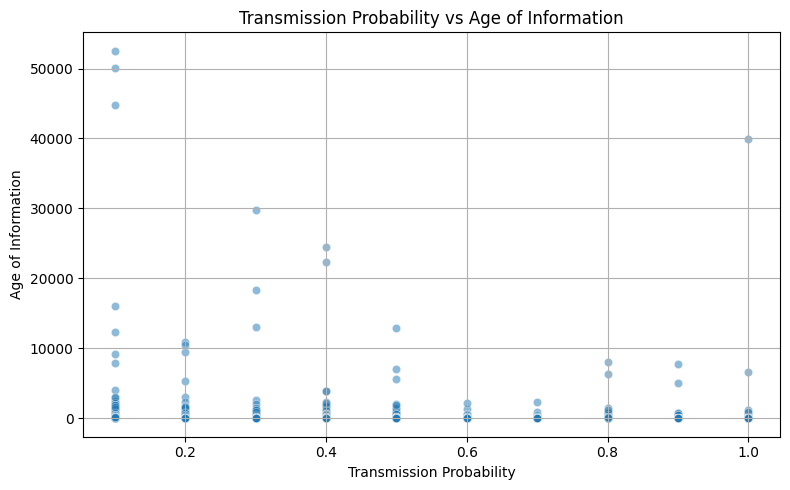

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="transmission_probability", y="age_of_information", alpha=0.5)
plt.title("Transmission Probability vs Age of Information")
plt.xlabel("Transmission Probability")
plt.ylabel("Age of Information")
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-4-18995277e276>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="traffic_type", y="age_of_information", palette="Set2")


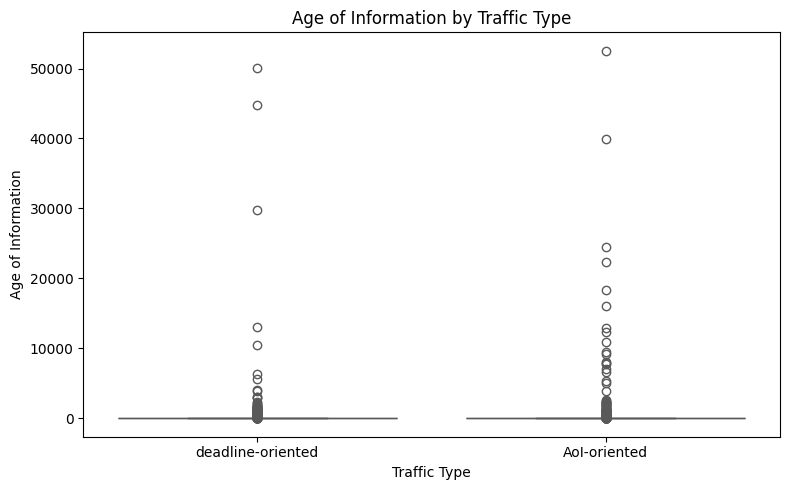

In [4]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="traffic_type", y="age_of_information", palette="Set2")
plt.title("Age of Information by Traffic Type")
plt.xlabel("Traffic Type")
plt.ylabel("Age of Information")
plt.tight_layout()
plt.show()

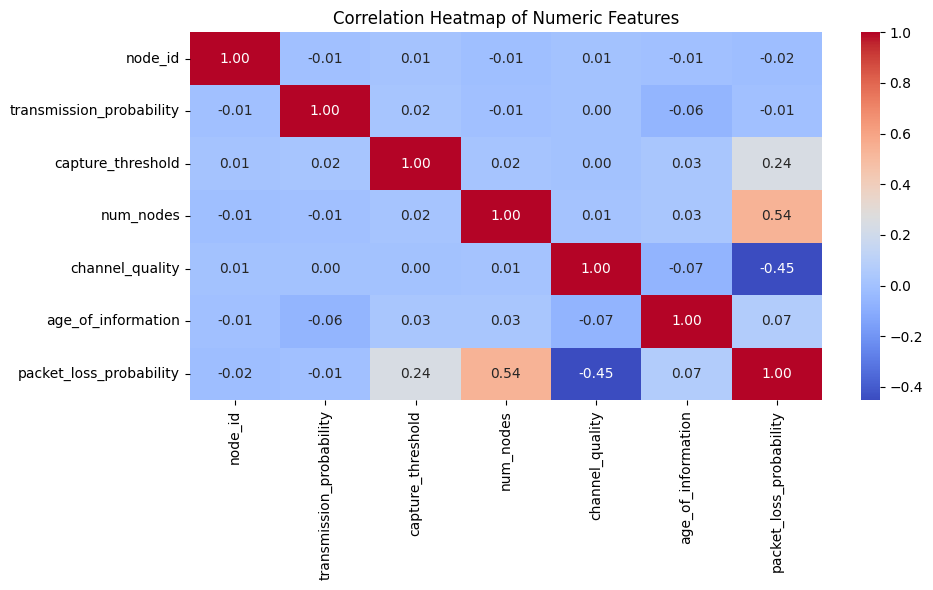

In [5]:
plt.figure(figsize=(10, 6))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=["age_of_information"])
X = pd.get_dummies(df.drop(columns=["age_of_information"]), drop_first=True)
y = df["age_of_information"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
feature_importances = sorted(zip(X.columns, model.feature_importances_), key=lambda x: x[1], reverse=True)

print("MSE:", mse)
print("R²:", r2)
print("Top 5 Important Features:", feature_importances[:5])

MSE: 873969.2912617011
R²: 0.6030713975061796
Top 5 Important Features: [('packet_loss_probability', 0.7596109941639012), ('transmission_probability', 0.06662349928854082), ('traffic_type_deadline-oriented', 0.058620098571699676), ('channel_quality', 0.04519116230892511), ('capture_threshold', 0.01680696572185609)]


## 3. Machine Learning Model Results
**Model:** Random Forest Regressor
- MSE: ~873,969.29
- R² Score: 0.60

**Top 5 Influential Features on AoI:**
1. `packet_loss_probability`
2. `transmission_probability`
3. `traffic_type_deadline-oriented`
4. `channel_quality`
5. `capture_threshold`

### Sample Predictions:
```python
model.predict(X_test_scaled[:3])
```

## 4. Analysis and Real-World Insights
**Key Factors:** Packet loss is the strongest predictor of poor AoI. Traffic type and channel conditions also influence freshness.

**Optimization Strategies:**
1. Use adaptive retransmission for TD traffic during network congestion.
2. Schedule TAoI transmissions during low-interference slots.

**Applications:**
- **Predictive Maintenance:** Minimizing AoI ensures that control systems are using current data to avoid machine failure.
- **Smart Grids:** Reliable low-AoI updates allow quick response to voltage or load changes.
